In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [4]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
#from FlyMH import FlyMH
from csMALA import csMALA
from likelihood_functions import Norm_lkhd
from likelihood_functions import Norm_2_d_lkhd

In [5]:
npr.seed(1)
N = 100000
#dataType = "Gaussian"
dataType = "logNormal"
if dataType == "Gaussian":
    dataset = npr.randn(N)
elif dataType == "logNormal":
    dataset = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(dataset)
realStd = np.std(dataset)
print(f"Mean of dataset = {realMean}")
print(f"Std of dataset = {realStd}")
MAP = np.array([realMean, realStd])

norm_lkhd = Norm_lkhd()

Mean of dataset = 1.6556605601701955
Std of dataset = 2.16504884554378


In [6]:
def plt_samples(dataset):
    # Create a jointplot with fading datapoints
    sns.jointplot(x=dataset[:, 0], y=dataset[:, 1], kind='hex', cmap='Blues', alpha=1)
    
    # Show the plot
    plt.show()


In [7]:
def compute_autocorrelation(arr):
    n = len(arr)
    mean = np.mean(arr)
    autocorr = np.correlate(arr - mean, arr - mean, mode='full')
    autocorr = autocorr[n-1:] / autocorr[n-1]
    return autocorr


In [ ]:
from scipy.stats import norm

def compute_bvm(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    se = std / np.sqrt(n)
    
    # Compute the Bernstein-Von Mises approximation
    bvm = norm(loc=mean, scale=se)
    
    return bvm


## VanillaMH

In [ ]:
# #Long VanillaMH run
# T = 100000
# norm_lkhd = Norm_lkhd()
# ref_vanillMH = MetropolisHastings(dataset, norm_lkhd)
# ref_vanillMH.run(T,MAP, dataset)
# ref_run = ref_vanillMH.S
# ref_run_mean = np.mean(ref_run[:,0])
# ref_run_std = np.std(ref_run[:,0])
# plt_samples(ref_run)  
# print(np.mean(ref_vanillMH.accept))
# print(ref_vanillMH.alpha)

Execution time: 3.363003 seconds


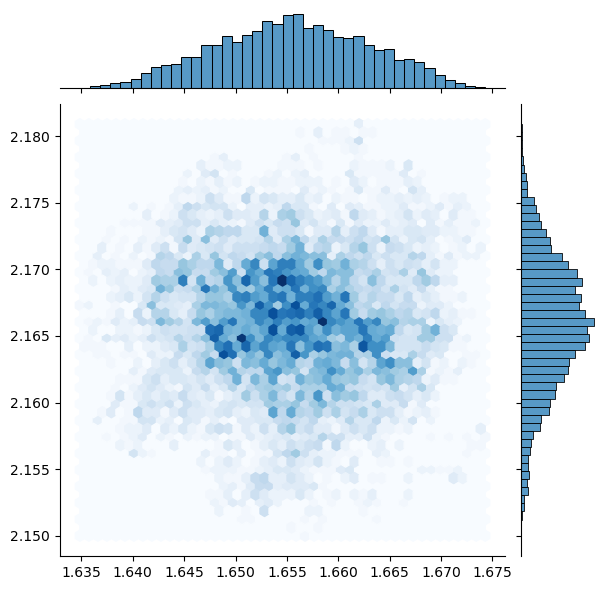

In [8]:
T = 10000
test_vanillMH = MetropolisHastings(dataset, norm_lkhd)

start_time = time.time()
test_vanillMH.run(T, MAP, dataset)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
plt_samples(vanillMH_run)

## ConsensusMH

[array([[1.65566056, 2.16504885],
       [1.65523631, 2.16416684],
       [1.65601474, 2.16449836],
       ...,
       [1.68795107, 2.1468332 ],
       [1.68628094, 2.14536745],
       [1.68810919, 2.1451077 ]]), array([[1.65566056, 2.16504885],
       [1.65581301, 2.1651955 ],
       [1.6562907 , 2.16542342],
       ...,
       [1.64291118, 2.18591409],
       [1.64299705, 2.18593067],
       [1.64505854, 2.1868216 ]]), array([[1.65566056, 2.16504885],
       [1.65368435, 2.16649551],
       [1.65386854, 2.16616899],
       ...,
       [1.6629971 , 2.15659091],
       [1.66239159, 2.15670596],
       [1.66239159, 2.15670596]]), array([[1.65566056, 2.16504885],
       [1.65765413, 2.16415889],
       [1.65765711, 2.1635836 ],
       ...,
       [1.65458118, 2.15411919],
       [1.65504042, 2.15166211],
       [1.6526696 , 2.15094958]])]
Execution time: 4.320444 seconds


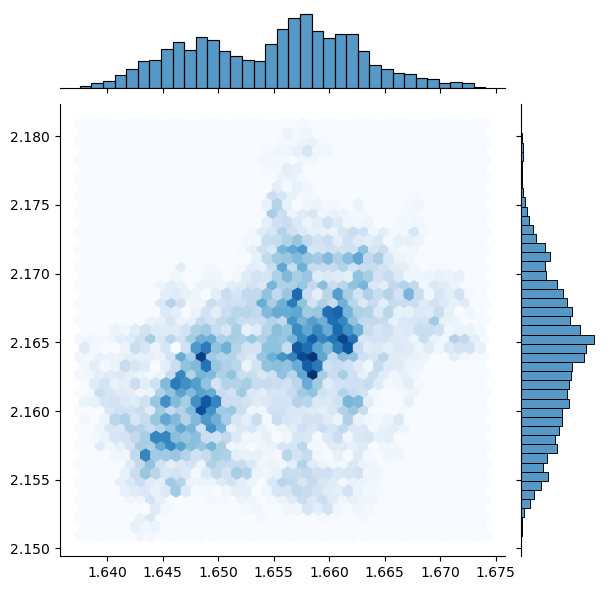

In [ ]:
num_batches = 4
T = 10000

consMH = ConsensusMH(dataset, norm_lkhd, num_batches)

start_time = time.time()
consMH_run = consMH.run(T, MAP)
end_time = time.time()
ex_time_ConsMH = end_time - start_time
print(f"Execution time: {ex_time_ConsMH:.6f} seconds")
plt_samples(consMH_run)

## FlyMH


In [ ]:
# batch_percentage = 0.9
# T = 1000

# test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

# start_time = time.time()
# test_FlyMH_run = test_FlyMH.run(T, MAP)
# end_time = time.time()
# ex_time_FLYMH = end_time - start_time
# print(f"Execution time: {ex_time_FLYMH:.6f} seconds")
# plt_samples(test_FlyMH_run)

## MALA


Execution time: 22.571631 seconds


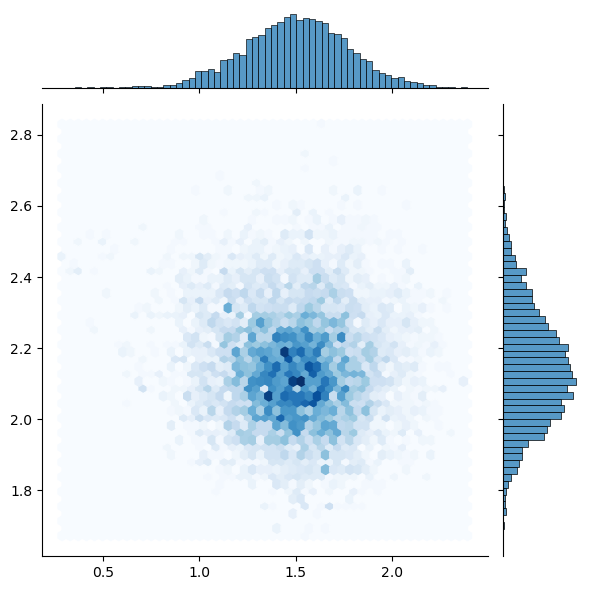

In [ ]:
batch_percentage = 1
T = 10000

test_MALA = csMALA(dataset, norm_lkhd, batch_percentage=batch_percentage)
test_MALA.corr_param = 0

start_time = time.time()
test_MALA.run(T, MAP)
end_time = time.time()
ex_time_MALA = end_time - start_time
test_MALA_samples = test_MALA.S
print(f"Execution time: {ex_time_MALA:.6f} seconds")
plt_samples(test_MALA_samples)

## csMALA

Execution time: 19.484909 seconds


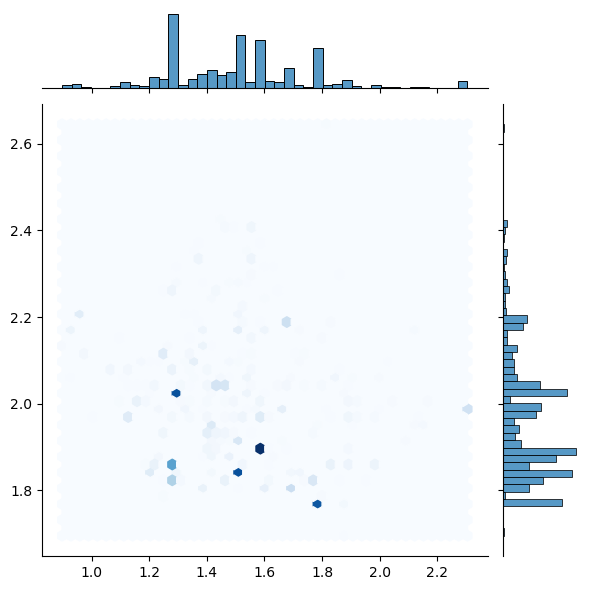

In [ ]:
batch_percentage = 0.1
T = 10000

test_csMALA = csMALA(dataset,norm_lkhd ,batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA.run(T, MAP)
end_time = time.time()
ex_time_csMALA = end_time - start_time
test_csMALA_samples = test_csMALA.S
print(f"Execution time: {ex_time_csMALA:.6f} seconds")
plt_samples(test_csMALA_samples)

## New Dataset

 Try a dataset which consists of two normal distributions with different means
 - How much are the algortihms able to capture the two modes?

(array([1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 7.000e+00, 1.700e+01,
        1.900e+01, 3.700e+01, 5.400e+01, 1.000e+02, 1.300e+02, 1.740e+02,
        2.510e+02, 3.250e+02, 4.590e+02, 5.280e+02, 6.350e+02, 8.660e+02,
        1.042e+03, 1.096e+03, 1.284e+03, 1.410e+03, 1.465e+03, 1.609e+03,
        1.666e+03, 1.612e+03, 1.562e+03, 1.371e+03, 1.297e+03, 1.165e+03,
        1.031e+03, 9.000e+02, 7.140e+02, 6.110e+02, 4.440e+02, 3.670e+02,
        2.990e+02, 1.880e+02, 1.220e+02, 9.300e+01, 6.100e+01, 3.900e+01,
        3.400e+01, 1.600e+01, 1.500e+01, 5.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 8.000e+00, 7.000e+00, 1.000e+01,
        2.600e+01, 4.600e+01, 6.500e+01, 1.160e+02, 2.020e+02, 2.350e+02,
        3.570e+02, 5.170e+02, 7.340e+02, 9.490e+02, 1.248e+03, 1.560e+03,
        1.975e+03, 2.388e+03, 2.851e+03, 3.355e+03, 3.787e+03, 4.091e+03,
        4.375e+03, 4.661e+03, 4.692e+03, 4.660e+03, 4.621e+03, 4.333e+03,
        4.041e+03, 3.693e+03, 3.148e+0

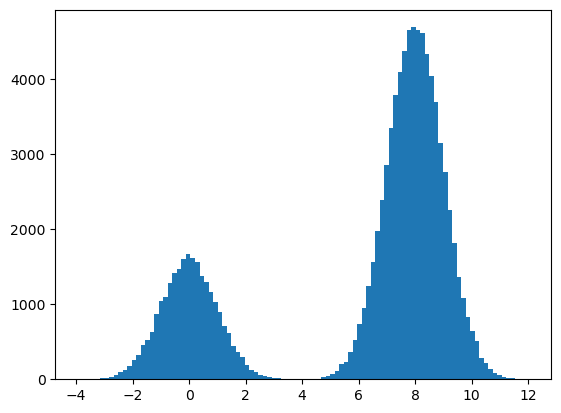

In [ ]:
p =1/4
N=100000
bernoulli_array = np.random.choice([0, 1], size=N, p=[1-p, p])

dataset_2_nd = np.where(bernoulli_array == 1, npr.randn(N), npr.randn(N) + 8)
plt.hist(dataset_2_nd, bins=100)

Execution time: 199.258001 seconds


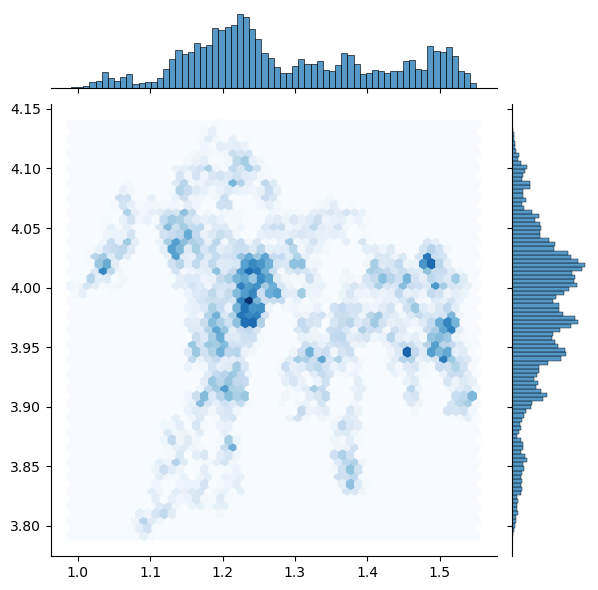

In [ ]:
T = 100000
norm_2 = Norm_2_d_lkhd()
test_vanillMH = MetropolisHastings(dataset_2_nd, norm_2)
theta = np.array([1,4])
start_time = time.time()
test_vanillMH.run(T, theta, dataset_2_nd)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
plt_samples(vanillMH_run)